#  Objectives:


1.   Downnloading the dataset to the notebook and performing inspections on the dataset
2.   Clarifying the target coulmn and predictors for the classification problem
3.   Normalizing the predictors and binarizing the target column
4.   Holding part of the dataset for testing the prediction capabilities of the model
5.   Building the deep learning model and testing the prediction capabilities



## a) Importing necessary packages and functions

In [1]:
#!pip install --upgrade pip 
#!pip install --upgrade tensorflow 
#!pip install matplotlib 
#!pip install sklearn 
import pandas as pd
import numpy as np
import sklearn
import tensorflow 
import tensorflow.keras 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

## b) Creating the Dataframe

### Dataset
#### The dataset is provided by University of California at Irvine Machine Learning Repository available at:
[UCI Machine Learning Repository](https://https://archive.ics.uci.edu/ml/datasets.php)
#### For this example, we use the glass dataset created by B. German.The purpose of this dataset is classifying different types of glass based  on the level od certain components, such as Potassium, Aluminium, etc.


In [3]:
# We clarify the download link and headers of the glass dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', names = ['Id number', 'refractive index',
                                                                                                       'Sodium', 'Magnesium', 
                                                                                                       'Aluminum', 'Silicon',
                                                                                                       'Potassium', 'Calcium', 
                                                                                                       'Barium', 'Iron', 
                                                                                                       'Type of glass'], index_col = 'Id number')

# Lets check the first 5 rows of the dataset
df.head()



,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Let's check some statistics of the data

In [4]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Let's check if the data types are correct

In [5]:
df.dtypes

refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type of glass         int64
dtype: object

In [6]:
df.shape

(214, 10)

### Now, let's check if data has any missing point

In [7]:
missing_data = df.isnull()
missing_data.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id number,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False


In [8]:
missing_data.nunique()

refractive index    1
Sodium              1
Magnesium           1
Aluminum            1
Silicon             1
Potassium           1
Calcium             1
Barium              1
Iron                1
Type of glass       1
dtype: int64

## c) Preliminary Inspection of the dataset

In [9]:
# First, we check the numerical columns
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## d) Clarifying the target and Predictors' columns
#### This is how we create dataframes for predictors and the target column. At the end we check the dimension of these dataframes

In [10]:
target_column = 'Type of glass'
predictors = list(set(list(df.columns))-set([target_column]))
x = df[predictors].values
y = df[target_column].values

predictors

['Magnesium',
 'Silicon',
 'Aluminum',
 'Calcium',
 'Potassium',
 'Barium',
 'Iron',
 'refractive index',
 'Sodium']

In [11]:
[(x.shape, y.shape)]

[((214, 9), (214,))]

In [12]:
x[0:5,:]

array([[4.49000e+00, 7.17800e+01, 1.10000e+00, 8.75000e+00, 6.00000e-02,
        0.00000e+00, 0.00000e+00, 1.52101e+00, 1.36400e+01],
       [3.60000e+00, 7.27300e+01, 1.36000e+00, 7.83000e+00, 4.80000e-01,
        0.00000e+00, 0.00000e+00, 1.51761e+00, 1.38900e+01],
       [3.55000e+00, 7.29900e+01, 1.54000e+00, 7.78000e+00, 3.90000e-01,
        0.00000e+00, 0.00000e+00, 1.51618e+00, 1.35300e+01],
       [3.69000e+00, 7.26100e+01, 1.29000e+00, 8.22000e+00, 5.70000e-01,
        0.00000e+00, 0.00000e+00, 1.51766e+00, 1.32100e+01],
       [3.62000e+00, 7.30800e+01, 1.24000e+00, 8.07000e+00, 5.50000e-01,
        0.00000e+00, 0.00000e+00, 1.51742e+00, 1.32700e+01]])

In [13]:
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Also, we need to set target column to start with zero

In [14]:
df[target_column].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [15]:
objects_to_integers = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6}
df[target_column].replace(objects_to_integers, inplace = True)
df[target_column].value_counts()

1    76
0    70
6    29
2    17
4    13
5     9
Name: Type of glass, dtype: int64

## e) Normalizing the predictors
#### This removes the effect of units for different attributes.

In [16]:
df[predictors]=df[predictors]/df[predictors].max()
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.989853,0.771453,0.597891,0.412830,0.963412,0.080041,0.553240,0.055570,0.111783,1.780374
std,0.001980,0.046985,0.321249,0.142648,0.010271,0.105023,0.087903,0.157847,0.191056,2.103739
min,0.985149,0.617376,0.000000,0.082857,0.925739,0.000000,0.335392,0.000000,0.000000,0.000000
25%,0.988652,0.742664,0.471047,0.340000,0.958494,0.019726,0.508956,0.000000,0.000000,0.000000
50%,0.989406,0.765247,0.775056,0.388571,0.965257,0.089372,0.531192,0.000000,0.000000,1.000000
75%,0.990370,0.795455,0.801782,0.465714,0.969202,0.098229,0.566553,0.000000,0.196078,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


#### As you can see, every attribute has the minimum of zero and the maximum of 1.

## f) Sampling training and test sets from the dataframe
#### Here, we are holding a portion of dataset to test the prediction capabilities of model later.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
[x_train.shape , x_test.shape , y_train.shape , y_test.shape]


[(128, 9), (86, 9), (128,), (86,)]

## g) Encode the target variable to binary
#### We are transforming the traget column to binary values. The reason for this transformation is that the loss function that we use later (categorical_crossentropy) only works with binary values.

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
(y_train.shape, y_test.shape) 

((128, 7), (86, 7))

## h)Defining the Deep Learning model


In [19]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 9))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model

## i) Compiling the model
#### We clarify the parameters of the model, such as optimizer, loss function etc.

In [20]:
model.compile(optimizer = Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.metrics_names

['loss', 'accuracy']

## j) Train the model
#### We train the model on the training set. In this step, we optimize the weights betweeen layers.

In [22]:
history = model.fit(x_train, y_train, epochs=20)

Train on 128 samples
Epoch 1/20
128/128 [==============================] - 1s 9ms/sample - loss: 11.2068 - accuracy: 0.1484
Epoch 2/20
128/128 [==============================] - 0s 137us/sample - loss: 11.5335 - accuracy: 0.3438
Epoch 3/20
128/128 [==============================] - 0s 150us/sample - loss: 9.7192 - accuracy: 0.2969
Epoch 4/20
128/128 [==============================] - 0s 139us/sample - loss: 6.7572 - accuracy: 0.3203
Epoch 5/20
128/128 [==============================] - 0s 110us/sample - loss: 4.5665 - accuracy: 0.3906
Epoch 6/20
128/128 [==============================] - 0s 131us/sample - loss: 3.1382 - accuracy: 0.3438
Epoch 7/20
128/128 [==============================] - 0s 154us/sample - loss: 2.5287 - accuracy: 0.1562
Epoch 8/20
128/128 [==============================] - 0s 159us/sample - loss: 1.9070 - accuracy: 0.3984
Epoch 9/20
128/128 [==============================] - 0s 132us/sample - loss: 2.0287 - accuracy: 0.3281
Epoch 10/20
128/128 [======================

#### Since the number of epochs was set to 20, the model is optimized over trainig set 20 times. We can check the training in the following plot

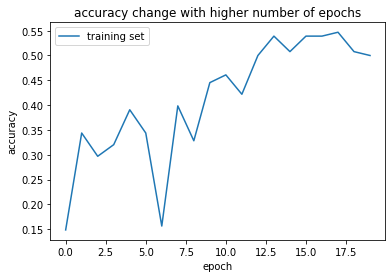

In [27]:
plt.plot(history.history['accuracy'])
plt.title('accuracy change with higher number of epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

## k) Accuracy of the model on the test set
#### Now, it is the time to check the prediction capability of our optimized model(weights) on the test set which we held back. In this step, the model or specifically the weights does not change. We report the accuracy of the model on the test set.

In [28]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy on the test set is: ', scores[1])

Accuracy on the test set is:  0.54651165
